In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
print("Imported Libraries")

Imported Libraries


In [24]:
df = pd.read_csv("Salary_Data.csv")
print("Loaded Dataset")
df.head()

Loaded Dataset


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


### Dataset Overview

Dataset Name: Salary Dataset
Each Row represents one employee

Columns include demographic and professional attributes 
(age, gender, job title, experience) along with the employee's salary.

Assumed Target Variable: salary

In [25]:
df.shape

(6704, 6)

### Dataset Shape

The dataset contains 6,704 rows and 6 columns.

Each row represents one employee, and each column represents a feature describing the employee or their salary.

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


### Column Information

The dataset contains the following columns:

- Age: Numeric (float). Represents the age of the employee.
- Gender: Categorical. Represents the gender of the employee.
- Education Level: Categorical. Represents the highest education attained.
- Job Title: Categorical. Represents the employee's job role.
- Years of Experience: Numeric (float). Represents total work experience in years.
- Salary: Numeric (float). Represents the annual salary of the employee.

Target Variable:
- Salary

Feature Variables:
- Age
- Gender
- Education Level
- Job Title
- Years of Experience


In [27]:
df.isna().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

### Data Quality Observations

- The dataset contains missing values in multiple columns.
- Salary has a small number of missing values compared to the total number of rows.
- Education Level and Years of Experience also contain missing values.
- Numeric columns show a wide range of values, indicating potential outliers.
- Further cleaning will be required before modeling.


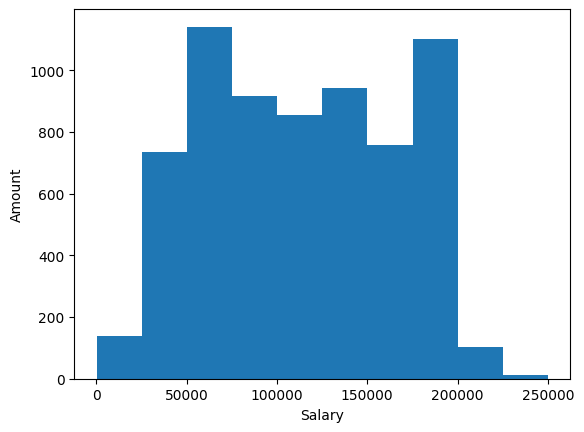

In [28]:
plt.hist(df["Salary"])
plt.xlabel("Salary")
plt.ylabel("Amount")
plt.show()

### Salary Distribution

The salary distribution appears to be right-skewed.
Most employees earn between approximately 40,000 and 180,000, while a smaller number of employees earn very high salaries.
This indicates the presence of outliers on the higher salary end.


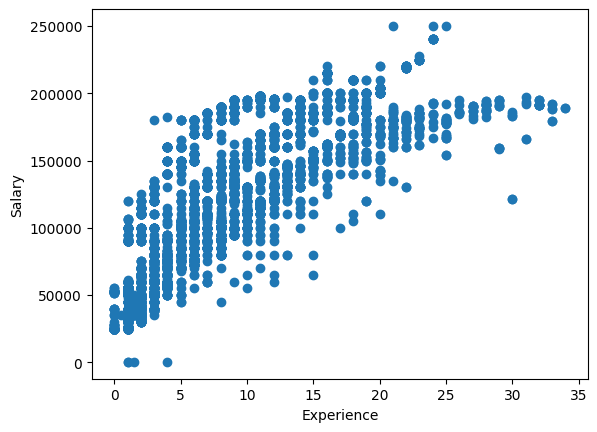

In [29]:
plt.scatter(df["Years of Experience"], df["Salary"])
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()

### Years of Experience vs Salary

There is a clear positive relationship between years of experience and salary.
As experience increases, salary generally increases as well, though the relationship is not perfectly linear.
The data shows noticeable spread at most experience levels, indicating noise.
A few points lie far above or below the general trend, suggesting the presence of outliers.


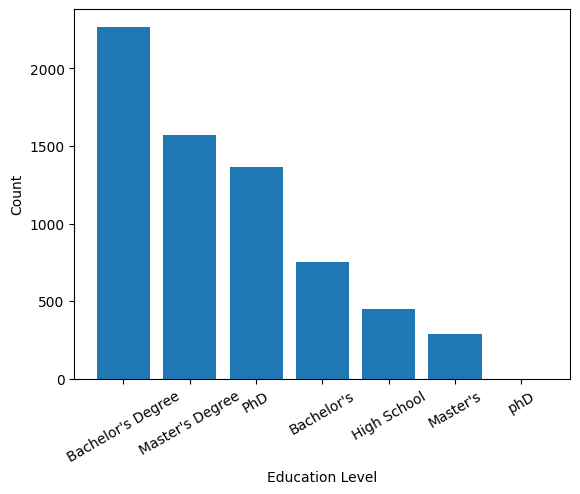

In [35]:
edu_counts = df["Education Level"].value_counts()
plt.bar(edu_counts.index, edu_counts.values)
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.show()

Most records belong to Bachelor's and Master's education levels.
PhD and High School categories have fewer samples.
The dataset is imbalanced across education levels.


In [36]:
df["Education Level"].value_counts()

Education Level
Bachelor's Degree    2267
Master's Degree      1573
PhD                  1368
Bachelor's            756
High School           448
Master's              288
phD                     1
Name: count, dtype: int64

In [48]:
df["Education Level"] = df["Education Level"].replace({
    "Bachelor's Degree": "Bachelor's",
    "Master's Degree": "Master's",
    "phD": "PhD"
})
print("Renamed Labels")

Renamed Labels


Education level labels were inconsistent and required standardization before analysis.


In [49]:
df["Education Level"].value_counts()

Education Level
Bachelor's     3023
Master's       1861
PhD            1369
High School     448
Name: count, dtype: int64

In [54]:
df_clean = df.dropna(subset=["Salary", "Education Level"])
high_school = df_clean[df_clean["Education Level"] == "High School"]["Salary"]
bachelors   = df_clean[df_clean["Education Level"] == "Bachelor's"]["Salary"]
masters     = df_clean[df_clean["Education Level"] == "Master's"]["Salary"]
phd         = df_clean[df_clean["Education Level"] == "PhD"]["Salary"]

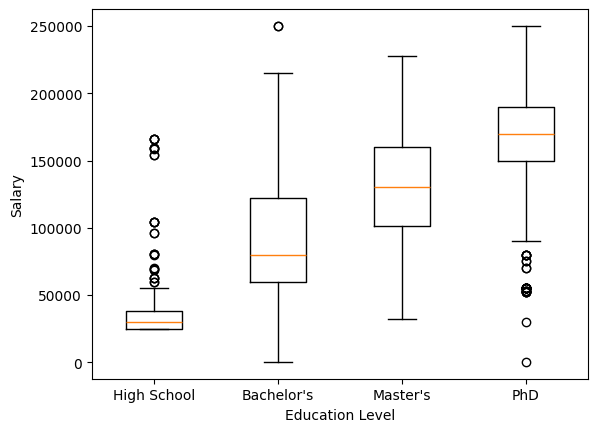

In [55]:
plt.boxplot(
    [high_school, bachelors, masters, phd],
    tick_labels=["High School", "Bachelor's", "Master's", "PhD"]
)
plt.xlabel("Education Level")
plt.ylabel("Salary")
plt.show()


### Education Level vs Salary

Salary generally increases with higher education levels.
High School salaries have the lowest median with limited variation.
Bachelor’s and Master’s degrees show higher median salaries and wider distributions.
PhD holders have the highest median salary and the greatest variability.
Outliers are present across all education levels.

In [57]:
male_salary = df_clean[df_clean["Gender"] == "Male"]["Salary"]
female_salary = df_clean[df_clean["Gender"] == "Female"]["Salary"]

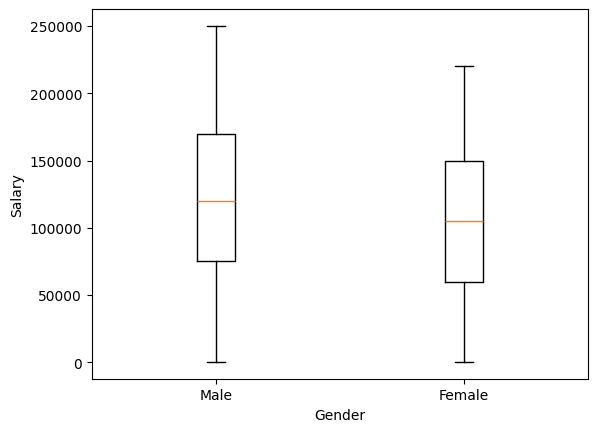

In [58]:
plt.boxplot(
    [male_salary, female_salary],
    tick_labels=["Male", "Female"]
)
plt.xlabel("Gender")
plt.ylabel("Salary")
plt.show()


Gender vs Salary shows a difference in median salaries.
Distributions overlap significantly, indicating gender alone does not explain salary differences.
Outliers exist for both genders.

In [64]:
df[["Age", "Years of Experience", "Salary"]].corr()

,Age,Years of Experience,Salary
Age,1.000000,0.937655,0.728053
Years of Experience,0.937655,1.000000,0.808969
Salary,0.728053,0.808969,1.000000


### Correlation Analysis

Years of Experience has the strongest correlation with Salary.
Age also correlates positively with Salary but less strongly.
Age and Years of Experience are highly correlated with each other, indicating multicollinearity.
Experience is likely the most useful numerical predictor for salary.
